In [1]:
import requests
import pandas as pd
from CCI import calculate_cci
from RSI import calculate_rsi
from RSI import RSI_signal
from SuperTrend import *
from SuperTrend import *
from Stochastic import stochastic_signal
from Stochastic import calculate_stochastic
from BollingerBands import bollingerbands
from VWAP_getvolume import get_volume
from Stochastic_RSI import calculate_stochastic_rsi
from Bull_Bear_Power import *
from Forward_MarketData import get_OHLC

In [45]:
with open("access_token.txt","r") as f:
    token = f.read().strip()

In [46]:
token

'AaYMMumae3jghUYLWLuDOchs6VQccfD8mXXq-H60JotPJuoveHUAtSvfwpI4NTbSRFSUYdXzvIhHx_m93BBo-IOqTZ1EkDKSWoG2eR4_xralfzYo0LHvcLaT_5z6TOZlb5ezXNeKuvzZmJ9zJBnL4iwO8BAZxXjQriBDYBnT3h6omIqEW_gi1xziT_NhHhjevpM-kTaPeJKGo1CDZRAoTEi0ivbkCkPgJSLx6dnzVxFEKhLHchrMLlmMt7-J2NHO9QXTEwtIH7bpICfeQBP8bOqTU3uLFyWKYval5Ko0N7dWqswO2_UddjbbW-b2sbTHbXS2x41ohZKqdNCEtWqnUdzrFOu_HE3wzqGFKeuRLPxnv4FUCpqb8XPRtZIFkqXxwAd-n2p1YQWihxZ9fBxVmpKC-UueciqtB9p3zClDE8Y'

In [47]:
data = get_OHLC(token)

c:\Users\z_lame\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1063: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.montelnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [48]:
data = data['Elements']

In [49]:
df = pd.DataFrame(data)

In [50]:
df.head()

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,Date
0,EEX DEBY012024,Cal-2024,133.50,134.85,131.00,131.20,132.12,275,78080,2023-09-04T00:00:00.0000000
1,EEX DEBY012024,Cal-2024,132.00,133.30,129.75,132.50,131.99,420,78410,2023-09-05T00:00:00.0000000
2,EEX DEBY012024,Cal-2024,132.51,133.00,127.42,127.70,128.16,417,78745,2023-09-06T00:00:00.0000000
3,EEX DEBY012024,Cal-2024,128.25,129.28,126.50,129.25,128.68,482,79186,2023-09-07T00:00:00.0000000
4,EEX DEBY012024,Cal-2024,131.00,132.00,127.26,128.00,127.83,372,79469,2023-09-08T00:00:00.0000000


In [10]:
df.index = pd.to_datetime(df['Date'])

In [11]:
df.drop('Date',axis=1,inplace=True)

## Calculating RSI

In [13]:
df_rsi = df.copy()

In [14]:
df_rsi['RSI'] = calculate_rsi(df)

In [15]:
df_rsi.tail()

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,RSI
Date,,,,,,,,,,
2024-10-09,EEX DEBY012025,Cal-2025,84.50,85.69,83.90,85.23,84.74,560,99090,61.716937
2024-10-10,EEX DEBY012025,Cal-2025,84.75,88.29,84.50,87.90,88.08,559,99492,64.130435
2024-10-11,EEX DEBY012025,Cal-2025,87.86,89.05,87.11,88.10,88.25,485,99768,62.921348
2024-10-14,EEX DEBY012025,Cal-2025,87.20,90.35,87.20,90.10,90.12,621,100145,68.646865
2024-10-15,EEX DEBY012025,Cal-2025,88.10,89.15,87.21,88.90,88.68,652,100510,57.801418


In [16]:
df_rsi.dropna(inplace=True)

In [17]:
df_rsi.xlsx = df_rsi.to_excel('RSI.xlsx')

In [18]:
df_rsi = RSI_signal(df_rsi)

In [20]:
# all bearish signals in this period
bearish_df = df_rsi[df_rsi['RSI_Signal'] == 'Bearish']

In [21]:
# all bullish signals in this period
bullish_df = df_rsi[df_rsi['RSI_Signal'] == 'Bullish']

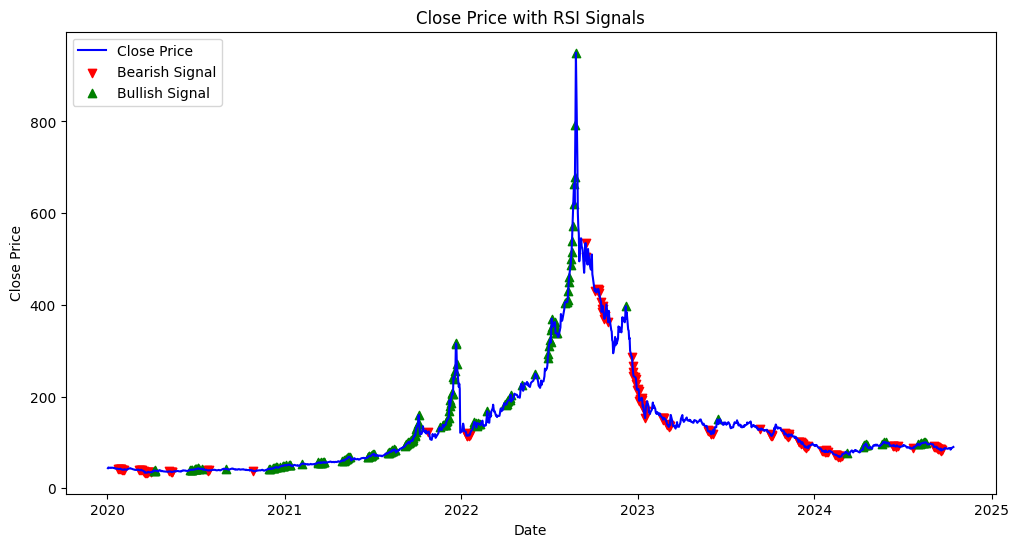

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df['Close'], label='Close Price', color='blue')
ax.scatter(bearish_df.index, bearish_df['Close'], label='Bearish Signal', marker='v', color='red')
ax.scatter(bullish_df.index, bullish_df['Close'], label='Bullish Signal', marker='^', color='green')
plt.title('Close Price with RSI Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

# Calculate Stochastic

In [18]:
df_stochastic = df.copy()

In [19]:
df_stochastic = calculate_stochastic(df_stochastic)

In [22]:
df_stochastic.tail()

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,Low_Min,High_Max,%K,%D,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,,,,
2024-10-09,EEX DEBY012025,Cal-2025,84.50,85.69,83.90,85.23,84.74,560,99090,82.50,88.94,53.736662,64.646042,False,False
2024-10-10,EEX DEBY012025,Cal-2025,84.75,88.29,84.50,87.90,88.08,559,99492,83.22,88.94,53.536862,57.567976,False,False
2024-10-11,EEX DEBY012025,Cal-2025,87.86,89.05,87.11,88.10,88.25,485,99768,83.60,89.05,68.926098,58.733207,False,False
2024-10-14,EEX DEBY012025,Cal-2025,87.20,90.35,87.20,90.10,90.12,621,100145,83.90,90.35,86.837007,69.766655,False,False
2024-10-15,EEX DEBY012025,Cal-2025,88.10,89.15,87.21,88.90,88.68,652,100510,83.90,90.35,85.404073,80.389059,False,False


In [20]:
df_stochastic = stochastic_signal(df_stochastic)

In [21]:
df_stochastic['Buy_Signal'].value_counts()

Buy_Signal
False    190
True      13
Name: count, dtype: int64

In [37]:
df_stochastic['Sell_Signal'].value_counts()

Sell_Signal
False    53
Name: count, dtype: int64

# Stochastic RSI

In [23]:
stoch_df = df_rsi.copy()

In [24]:
stoch_df = calculate_stochastic_rsi(stoch_df)

In [25]:
stoch_df.tail()

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,RSI,RSI_Low,RSI_High,Stoch_RSI,%K,%D
Date,,,,,,,,,,,,,,,
2024-10-09,EEX DEBY012025,Cal-2025,84.50,85.69,83.90,85.23,84.74,560,99090,61.716937,25.340136,61.716937,1.000000,0.811711,0.857619
2024-10-10,EEX DEBY012025,Cal-2025,84.75,88.29,84.50,87.90,88.08,559,99492,64.130435,31.476190,64.130435,1.000000,0.862277,0.828567
2024-10-11,EEX DEBY012025,Cal-2025,87.86,89.05,87.11,88.10,88.25,485,99768,62.921348,35.404392,64.130435,0.957910,0.985970,0.886653
2024-10-14,EEX DEBY012025,Cal-2025,87.20,90.35,87.20,90.10,90.12,621,100145,68.646865,41.851495,68.646865,1.000000,0.985970,0.944739
2024-10-15,EEX DEBY012025,Cal-2025,88.10,89.15,87.21,88.90,88.68,652,100510,57.801418,41.851495,68.646865,0.595249,0.851053,0.940998


In [26]:
def stochastic_rsi_signal(data, period=14, column='Close'):
    data['StochRSI_Signal'] = pd.cut(data['Stoch_RSI'], 
                                     bins=[-float('inf'), 0.2, 0.8, float('inf')],
                                     labels=['Buy', 'Neutral', 'Sell'])
    return data

In [27]:
stoch_df = stochastic_rsi_signal(stoch_df)

In [28]:
stoch_df.dropna(inplace=True)

In [30]:
stoch_df.tail()

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,RSI,RSI_Low,RSI_High,Stoch_RSI,%K,%D,StochRSI_Signal
Date,,,,,,,,,,,,,,,,
2024-10-09,EEX DEBY012025,Cal-2025,84.50,85.69,83.90,85.23,84.74,560,99090,61.716937,25.340136,61.716937,1.000000,0.811711,0.857619,Sell
2024-10-10,EEX DEBY012025,Cal-2025,84.75,88.29,84.50,87.90,88.08,559,99492,64.130435,31.476190,64.130435,1.000000,0.862277,0.828567,Sell
2024-10-11,EEX DEBY012025,Cal-2025,87.86,89.05,87.11,88.10,88.25,485,99768,62.921348,35.404392,64.130435,0.957910,0.985970,0.886653,Sell
2024-10-14,EEX DEBY012025,Cal-2025,87.20,90.35,87.20,90.10,90.12,621,100145,68.646865,41.851495,68.646865,1.000000,0.985970,0.944739,Sell
2024-10-15,EEX DEBY012025,Cal-2025,88.10,89.15,87.21,88.90,88.68,652,100510,57.801418,41.851495,68.646865,0.595249,0.851053,0.940998,Neutral


# Bull Bear Power

In [31]:
bullbeardf = df.copy()

In [32]:
bullbeardf = calculate_bull_bear_power(bullbeardf)

In [33]:
bullbeardf =generate_bulls_bears_signals(bullbeardf)

In [34]:
bullbeardf.tail()

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,EMA,Bull_Power,Bear_Power,BullsPower_Growing,BearsPower_Decreasing,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,,,,,
2024-10-09,EEX DEBY012025,Cal-2025,84.50,85.69,83.90,85.23,84.74,560,99090,86.309112,-0.619112,-2.409112,False,True,False,False
2024-10-10,EEX DEBY012025,Cal-2025,84.75,88.29,84.50,87.90,88.08,559,99492,86.536381,1.753619,-2.036381,True,False,False,False
2024-10-11,EEX DEBY012025,Cal-2025,87.86,89.05,87.11,88.10,88.25,485,99768,86.759756,2.290244,0.350244,True,False,False,False
2024-10-14,EEX DEBY012025,Cal-2025,87.20,90.35,87.20,90.10,90.12,621,100145,87.236933,3.113067,-0.036933,True,True,True,False
2024-10-15,EEX DEBY012025,Cal-2025,88.10,89.15,87.21,88.90,88.68,652,100510,87.474514,1.675486,-0.264514,False,True,False,True


In [35]:
bullbeardf ['Buy_Signal'].value_counts()

Buy_Signal
False    192
True      11
Name: count, dtype: int64

In [36]:
bullbeardf ['Sell_Signal'].value_counts()

Sell_Signal
False    179
True      24
Name: count, dtype: int64

# CCI

In [37]:
CCI_df = df.copy()

In [38]:
CCI_df = calculate_cci(CCI_df)

In [39]:
CCI_df.tail()

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,CCI
Date,,,,,,,,,,
2024-10-09,EEX DEBY012025,Cal-2025,84.50,85.69,83.90,85.23,84.74,560,99090,-56.805462
2024-10-10,EEX DEBY012025,Cal-2025,84.75,88.29,84.50,87.90,88.08,559,99492,74.964100
2024-10-11,EEX DEBY012025,Cal-2025,87.86,89.05,87.11,88.10,88.25,485,99768,141.772313
2024-10-14,EEX DEBY012025,Cal-2025,87.20,90.35,87.20,90.10,90.12,621,100145,188.400332
2024-10-15,EEX DEBY012025,Cal-2025,88.10,89.15,87.21,88.90,88.68,652,100510,121.965776


# SMA & EMA

In [40]:
def SMA(df , period = 20 ):

    df['SMA'] = df['Close'].rolling(window=period).mean()
    return df

In [41]:
glenitest = SMA(glenitest)

NameError: name 'glenitest' is not defined

In [80]:
glenitest

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,RSI,...,Buy_Signal,Sell_Signal,RSI_Low,RSI_High,Stoch_RSI,EMA,Bull_Power,Bear_Power,CCI,SMA
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,EEX DEBY012021,Cal-2021,44.65,44.65,43.80,43.85,43.85,168,30514,NaN,...,False,False,NaN,NaN,NaN,43.850000,0.800000,-0.050000,NaN,NaN
2020-01-03,EEX DEBY012021,Cal-2021,44.25,45.35,44.14,45.30,44.85,164,25195,NaN,...,False,False,NaN,NaN,NaN,44.057143,1.292857,0.082857,NaN,NaN
2020-01-06,EEX DEBY012021,Cal-2021,45.60,45.75,44.35,44.45,44.55,221,31104,NaN,...,False,False,NaN,NaN,NaN,44.113265,1.636735,0.236735,NaN,NaN
2020-01-07,EEX DEBY012021,Cal-2021,43.80,44.75,43.80,44.75,44.51,198,31443,NaN,...,False,False,NaN,NaN,NaN,44.204227,0.545773,-0.404227,NaN,NaN
2020-01-08,EEX DEBY012021,Cal-2021,44.70,44.95,44.40,44.40,44.58,265,31793,NaN,...,False,False,NaN,NaN,NaN,44.232195,0.717805,0.167805,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04,EEX DEBY012025,Cal-2025,85.81,88.00,85.65,87.30,87.64,538,97924,61.129568,...,False,False,18.654709,61.129568,1.000000,86.717478,1.282522,-1.067478,36.413975,86.3310
2024-10-07,EEX DEBY012025,Cal-2025,86.00,87.66,85.10,87.66,86.52,733,98252,54.686290,...,False,False,18.654709,61.129568,0.848304,86.852124,0.807876,-1.752124,42.547093,86.1835
2024-10-08,EEX DEBY012025,Cal-2025,86.50,87.01,84.30,84.31,84.70,697,98664,43.580247,...,False,False,18.654709,61.129568,0.586830,86.488964,0.521036,-2.188964,-47.594199,86.0165


# WVAP Calculation

In [118]:
from VWAP_getvolume import get_volume

In [119]:
data = get_volume(token)

c:\Users\z_lame\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1063: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.montelnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [120]:
data = data['Elements']

In [121]:
df = pd.DataFrame(data)

In [122]:
df.index = pd.to_datetime(df['ModifiedTime'])
df.drop('ModifiedTime',axis=1,inplace=True)

In [123]:
df.drop(['TradingTime', 'TradeStatus', 'OTC'], axis=1, inplace=True)

In [138]:
df

,TradeId,Price,Volume,VWAP
ModifiedTime,,,,
2024-10-14 08:07:17,7425508984230129919,87.20,3,261.60
2024-10-14 08:09:51,7425509649950061318,87.20,1,87.20
2024-10-14 08:12:14,7425510255540450668,87.39,1,87.39
2024-10-14 08:12:14,7425510259835417976,87.41,1,87.41
2024-10-14 08:12:18,7425510281310254496,87.45,4,349.80
...,...,...,...,...
2024-10-14 17:54:07,7425660205733958312,90.09,1,90.09
2024-10-14 17:55:18,7425660510676636949,90.10,1,90.10
2024-10-14 17:56:50,7425660910108597123,90.10,1,90.10


In [142]:
df['Volume'].sum()

900

In [125]:
def VWAP(df):
    df['VWAP'] = (df['Price'] * df['Volume'])

    sum_weighted_price = df['VWAP'].sum()
    sum_volume = df['Volume'].sum()

    wvap = sum_weighted_price / sum_volume
    return wvap

In [126]:
glenitestnew = VWAP(df)

In [127]:
glenitestnew

89.34325555555554

In [143]:
df['Price'].mean()

89.37508403361345

#### VWAP very similar to mean because trades are performed in 1MW

# Bollinger Bands

In [145]:
glenitest = bollingerbands(glenitest)

In [146]:
glenitest

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,RSI,...,RSI_High,Stoch_RSI,EMA,Bull_Power,Bear_Power,CCI,SMA,MA,BB_up,BB_down
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,EEX DEBY012021,Cal-2021,44.65,44.65,43.80,43.85,43.85,168,30514,NaN,...,NaN,NaN,43.850000,0.800000,-0.050000,NaN,NaN,NaN,NaN,NaN
2020-01-03,EEX DEBY012021,Cal-2021,44.25,45.35,44.14,45.30,44.85,164,25195,NaN,...,NaN,NaN,44.057143,1.292857,0.082857,NaN,NaN,NaN,NaN,NaN
2020-01-06,EEX DEBY012021,Cal-2021,45.60,45.75,44.35,44.45,44.55,221,31104,NaN,...,NaN,NaN,44.113265,1.636735,0.236735,NaN,NaN,NaN,NaN,NaN
2020-01-07,EEX DEBY012021,Cal-2021,43.80,44.75,43.80,44.75,44.51,198,31443,NaN,...,NaN,NaN,44.204227,0.545773,-0.404227,NaN,NaN,NaN,NaN,NaN
2020-01-08,EEX DEBY012021,Cal-2021,44.70,44.95,44.40,44.40,44.58,265,31793,NaN,...,NaN,NaN,44.232195,0.717805,0.167805,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04,EEX DEBY012025,Cal-2025,85.81,88.00,85.65,87.30,87.64,538,97924,61.129568,...,61.129568,1.000000,86.717478,1.282522,-1.067478,36.413975,86.3310,86.3310,89.984416,82.677584
2024-10-07,EEX DEBY012025,Cal-2025,86.00,87.66,85.10,87.66,86.52,733,98252,54.686290,...,61.129568,0.848304,86.852124,0.807876,-1.752124,42.547093,86.1835,86.1835,89.309677,83.057323
2024-10-08,EEX DEBY012025,Cal-2025,86.50,87.01,84.30,84.31,84.70,697,98664,43.580247,...,61.129568,0.586830,86.488964,0.521036,-2.188964,-47.594199,86.0165,86.0165,89.169552,82.863448


In [149]:
from SuperTrend import *

In [150]:
supertrend_test = calculate_atr(glenitest)

In [152]:
supertrend_test.tail()

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,RSI,...,CCI,SMA,MA,BB_up,BB_down,H-L,H-PC,L-PC,TR,ATR
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-04,EEX DEBY012025,Cal-2025,85.81,88.00,85.65,87.30,87.64,538,97924,61.129568,...,36.413975,86.3310,86.3310,89.984416,82.677584,2.35,1.65,0.70,2.35,2.581429
2024-10-07,EEX DEBY012025,Cal-2025,86.00,87.66,85.10,87.66,86.52,733,98252,54.686290,...,42.547093,86.1835,86.1835,89.309677,83.057323,2.56,0.36,2.20,2.56,2.510714
2024-10-08,EEX DEBY012025,Cal-2025,86.50,87.01,84.30,84.31,84.70,697,98664,43.580247,...,-47.594199,86.0165,86.0165,89.169552,82.863448,2.71,0.65,3.36,3.36,2.619286
2024-10-09,EEX DEBY012025,Cal-2025,84.50,85.69,83.90,85.23,84.74,560,99090,61.716937,...,-56.805462,85.8480,85.8480,88.771571,82.924429,1.79,1.38,0.41,1.79,2.306429
2024-10-10,EEX DEBY012025,Cal-2025,84.75,88.29,84.50,87.90,88.08,559,99492,64.130435,...,74.964100,85.9080,85.9080,88.951970,82.864030,3.79,3.06,0.73,3.79,2.402857


In [153]:
supertrend_test = calculate_supertrend(supertrend_test)

c:\Users\z_lame\Desktop\Montel Data\project\SuperTrend.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Close'][i-1] <= df['Final Upper Band'][i-1]:
c:\Users\z_lame\Desktop\Montel Data\project\SuperTrend.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Final Upper Band'][i] = df['Basic Upper Band'][i]
c:\Users\z_lame\Desktop\Montel Data\project\SuperTrend.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in p

In [154]:
supertrend_test.tail()

,TickerSymbol,ContractName,Open,High,Low,Close,Settlement,Volume,OpenInterest,RSI,...,H-L,H-PC,L-PC,TR,ATR,Basic Upper Band,Basic Lower Band,Final Upper Band,Final Lower Band,Supertrend
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-04,EEX DEBY012025,Cal-2025,85.81,88.00,85.65,87.30,87.64,538,97924,61.129568,...,2.35,1.65,0.70,2.35,2.581429,94.569286,79.080714,91.663571,80.138571,91.663571
2024-10-07,EEX DEBY012025,Cal-2025,86.00,87.66,85.10,87.66,86.52,733,98252,54.686290,...,2.56,0.36,2.20,2.56,2.510714,93.912143,78.847857,91.663571,80.138571,91.663571
2024-10-08,EEX DEBY012025,Cal-2025,86.50,87.01,84.30,84.31,84.70,697,98664,43.580247,...,2.71,0.65,3.36,3.36,2.619286,93.512857,77.797143,91.663571,80.138571,91.663571
2024-10-09,EEX DEBY012025,Cal-2025,84.50,85.69,83.90,85.23,84.74,560,99090,61.716937,...,1.79,1.38,0.41,1.79,2.306429,91.714286,77.875714,91.663571,80.138571,91.663571
2024-10-10,EEX DEBY012025,Cal-2025,84.75,88.29,84.50,87.90,88.08,559,99492,64.130435,...,3.79,3.06,0.73,3.79,2.402857,93.603571,79.186429,91.663571,80.138571,91.663571
